In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("egitim_verisi.csv")
df.head()

,CategoryName,GeneralCategory
0,Alternatif Müzik,Music
1,Aşçılık Ve Mutfak,Food & Drink
2,Bilim Teknoloji,Technology
3,Bilişim,Technology
4,Caz Müzik,Music


In [3]:
X = df["CategoryName"]
y = df["GeneralCategory"]

tfidf = TfidfVectorizer()

X_tfidf = tfidf.fit_transform(X).toarray()

X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [5]:
y_pred = model.predict(X_test)
y_pred

array(['Travel', 'Education', 'Technology', 'Health', 'Travel', 'Sports',
       'Travel', 'Technology', 'Food & Drink', 'Food & Drink',
       'Technology', 'Other', 'Travel', 'Art & Culture', 'Art & Culture',
       'Business', 'Travel', 'Technology', 'Sports', 'Technology',
       'Business', 'Sports', 'Health', 'Music', 'Music', 'Technology',
       'Art & Culture', 'Sports', 'Food & Drink', 'Travel',
       'Food & Drink', 'Business', 'Technology', 'Education', 'Travel',
       'Business', 'Travel', 'Other', 'Food & Drink', 'Music', 'Business',
       'Health', 'Travel', 'Art & Culture', 'Business', 'Sports',
       'Education', 'Education', 'Food & Drink', 'Education',
       'Art & Culture', 'Health', 'Travel', 'Technology', 'Business',
       'Technology', 'Health', 'Technology', 'Business', 'Health',
       'Sports', 'Food & Drink', 'Health', 'Health', 'Sports',
       'Food & Drink', 'Travel', 'Technology', 'Technology',
       'Art & Culture', 'Business', 'Technology', 'Heal

In [6]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.81


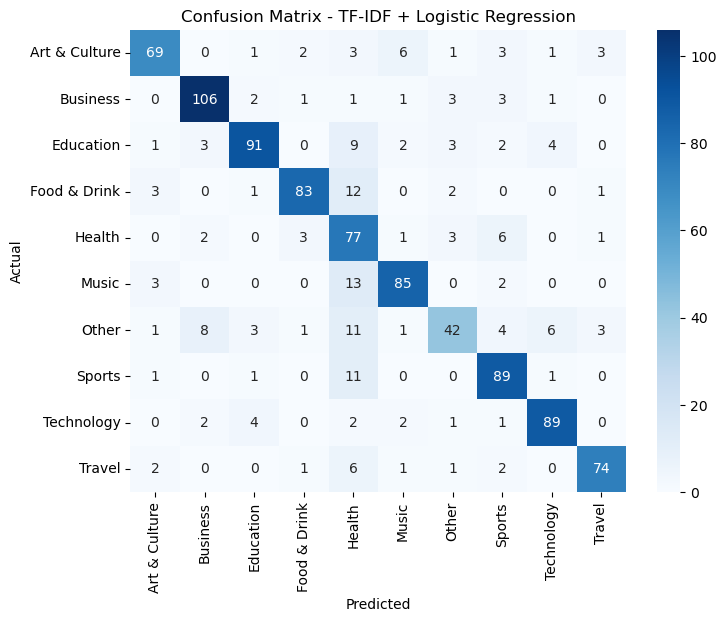

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - TF-IDF + Logistic Regression')
plt.show()